# Algerian Forest Fires Dataset Project EDA Part

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps


## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**


### 3.1 Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Read dataset
df= pd.read_csv("Algerian_forest_fires_dataset_UPDATE (6) (1).csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [46]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


* Looks like all the features are  identified as object but can be converted into numeric, if we remove rows which has strings.

In [47]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


## 3.4 Data Cleaning

In [48]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index,
we can make a new column based on the Region

 **1 : "Bejaia Region Dataset"**

 **2 : "Sidi-Bel Abbes Region Dataset"**

**Add new column with region**

In [49]:
df.loc[:122,'Region'] = 1 #df.loc[row_labels, column_labels]
df.loc[122:,'Region'] = 2
df[['Region']] = df[['Region']].astype(int)

In [50]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [51]:
# Remove null or na values rows
df.dropna().reset_index(drop=True)
df.shape

(246, 15)

In [52]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


**Null and other unwanted rows are removed**

In [53]:
df = df.drop(122).reset_index(drop=True)

**Some column names were misspaced so we can fix it**

In [54]:
# List out column names to check
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Looks like the values were misspaced so we can use **str.strip()** method

In [55]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Changing the required columns as integer data type**

In [56]:
print(df['month'].value_counts())



07       62
08       62
06       60
09       60
month     1
Name: month, dtype: int64


In [57]:
# df['month'] = df['month'].replace('month', 1)

In [58]:
# df['day'] = df['day'].replace('day', 1)

In [59]:
# df['month'] = df['month'].astype(int)

In [60]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.9+ KB


In [61]:
# List of columns to convert and replace non-integer values with 1
columns_to_convert = ['month','day', 'year', 'Temperature', 'RH', 'Ws']

# Loop through each column and perform the replacement and conversion
for col in columns_to_convert:
    df[col] = df[col].replace(to_replace='[^0-9]', value=1, regex=True).astype(int)


In [62]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    int32 
 1   month        245 non-null    int32 
 2   year         245 non-null    int32 
 3   Temperature  245 non-null    int32 
 4   RH           245 non-null    int32 
 5   Ws           245 non-null    int32 
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.1+ KB


**Changing the other columns to Float data type**

In [63]:
objects = [features for features in df.columns if df[features].dtypes == 'O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].str.strip()
        df[i] = pd.to_numeric(df[i], errors='coerce')


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    int32  
 1   month        245 non-null    int32  
 2   year         245 non-null    int32  
 3   Temperature  245 non-null    int32  
 4   RH           245 non-null    int32  
 5   Ws           245 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       245 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,245.0,15.693878,8.857256,1.0,8.000,16.00,23.000,31.0
month,245.0,7.473469,1.185772,1.0,7.000,7.00,8.000,9.0
year,245.0,2003.791837,128.478077,1.0,2012.000,2012.00,2012.000,2012.0
Temperature,245.0,32.044898,4.137249,1.0,30.000,32.00,35.000,42.0
RH,245.0,61.689796,15.355410,1.0,52.000,63.00,73.000,90.0
Ws,245.0,15.444898,2.953538,1.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,243.0,49.430864,47.665606,6.9,12.350,33.10,69.100,220.4


**Data Cleaning in target variable**

In [66]:
# Check Unique values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

aLooks like the values were misspaced so we can use **str.strip()** method

In [67]:
df.Classes = df.Classes.str.strip()

In [68]:
df.Classes.value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

#### Region 1 (Bejaia Region)

In [69]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


#### Region 2 (Sidi-Bel Abbes Region)

In [70]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classes,2
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
124,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
125,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
126,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
241,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [71]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

### 3.5 Exploratory Data Analysis (EDA)

In [72]:
## Drop the year feature 
df1 = df.drop(['day','month','year'],axis=1)

In [73]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes'] = np.where(df1['Classes'] == 'not fire', 0,1) 

In [74]:
# Check values count
df1.Classes.value_counts()

1    139
0    106
Name: Classes, dtype: int64

In [75]:
df1.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           1
FFMC           1
DMC            1
DC             2
ISI            1
BUI            1
FWI            2
Classes        0
Region         0
dtype: int64

## Insights or Observation

There are no missing values

In [76]:
## Check Duplicates
df1.duplicated().sum()

0

In [77]:
## 3.1 checking the number of uniques values of each columns
df1.nunique()

Temperature     20
RH              63
Ws              19
Rain            39
FFMC           173
DMC            166
DC             197
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [78]:
## check the satistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,245.0,15.693878,8.857256,1.0,8.000,16.00,23.000,31.0
month,245.0,7.473469,1.185772,1.0,7.000,7.00,8.000,9.0
year,245.0,2003.791837,128.478077,1.0,2012.000,2012.00,2012.000,2012.0
Temperature,245.0,32.044898,4.137249,1.0,30.000,32.00,35.000,42.0
RH,245.0,61.689796,15.355410,1.0,52.000,63.00,73.000,90.0
Ws,245.0,15.444898,2.953538,1.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,243.0,49.430864,47.665606,6.9,12.350,33.10,69.100,220.4


**Visualization of Distribution**

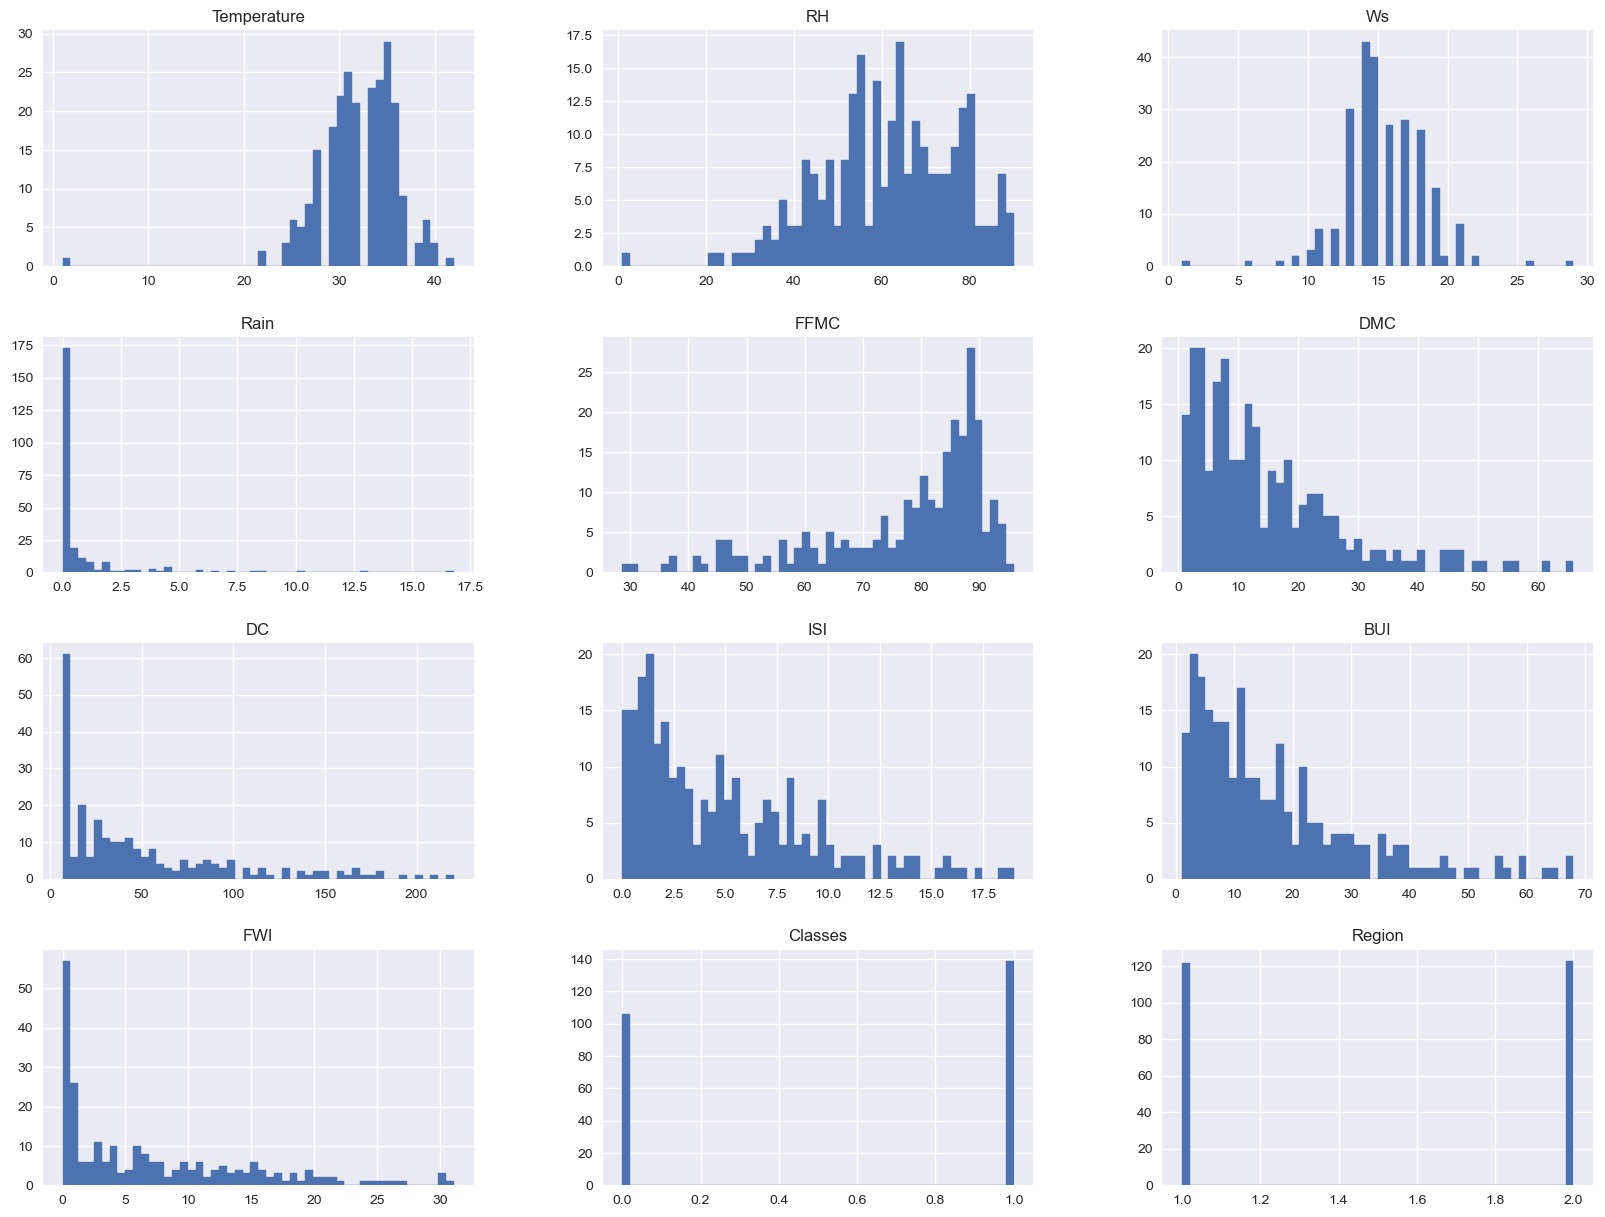

In [79]:
#plot density plot for all feature
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15),ec='b')
plt.show()

In [80]:
## percentage for piechart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.734694
0    43.265306
Name: Classes, dtype: float64

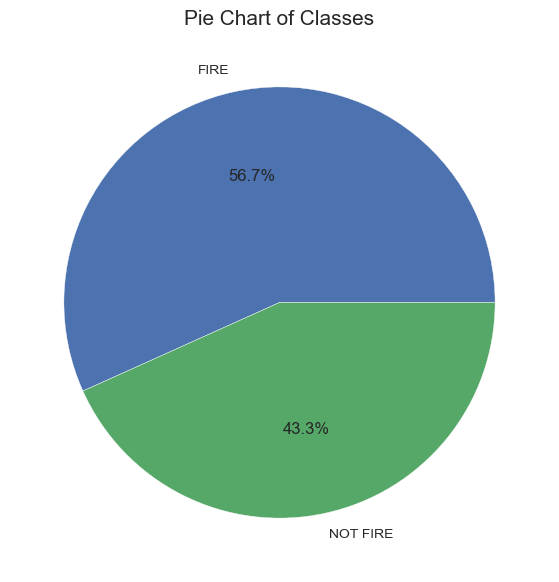

In [81]:
classeslabels = ['FIRE',"NOT FIRE"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabels,autopct="%1.1f%%" )
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()


**Checking Multicollinearity**

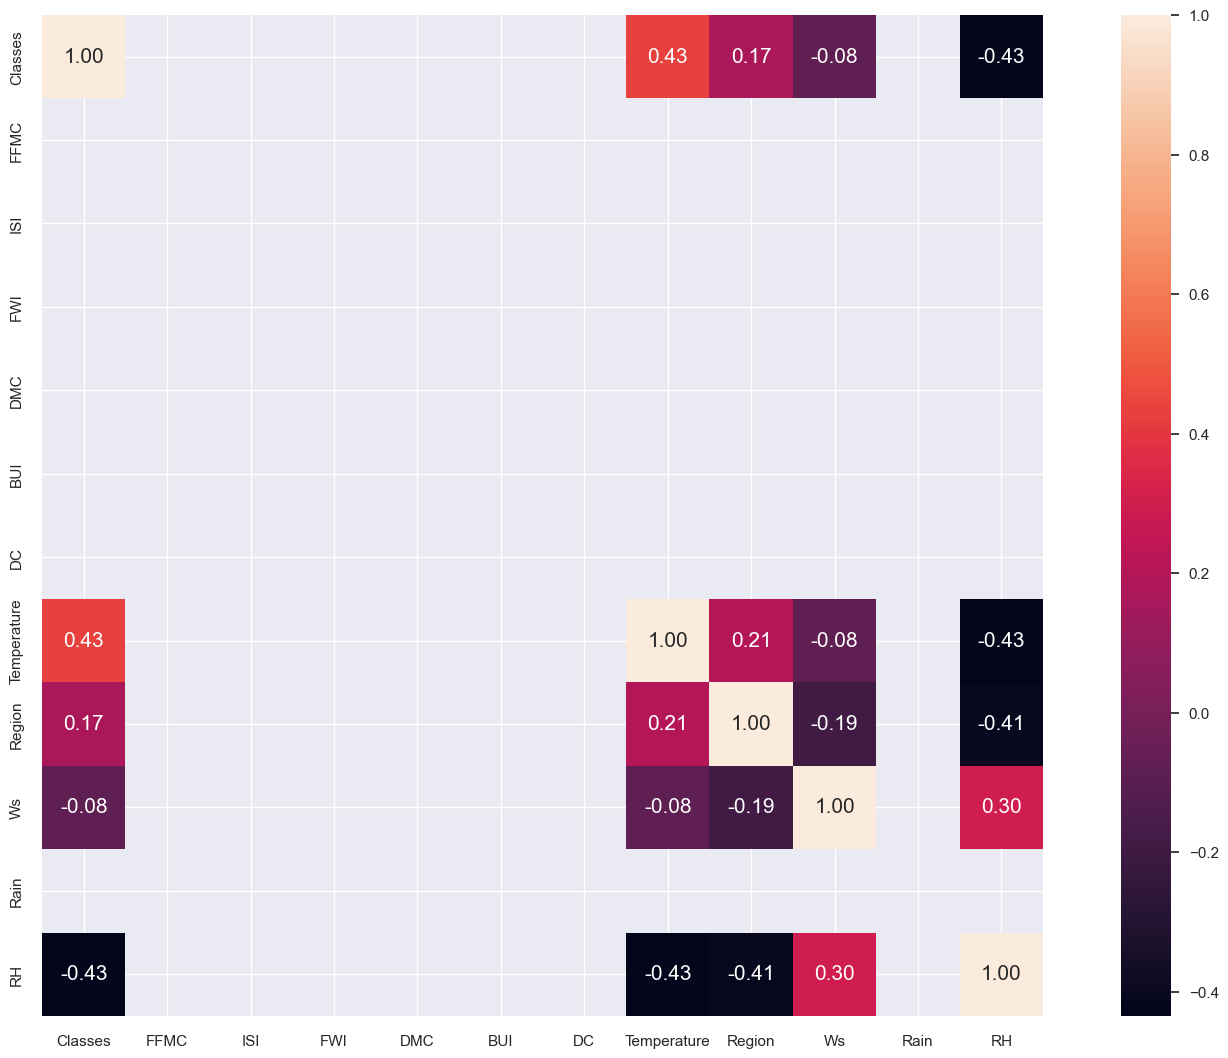

In [84]:
# Correlation chart
k = len(df1.columns)
cols = corr.nlargest(k, 'Classes')['Classes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Canadian Forest Fire Weather Index (FWI) System
This column can be considered for Regression problem

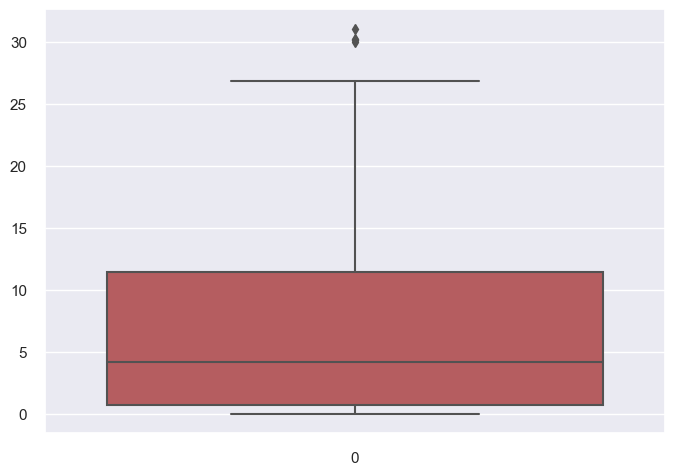

In [86]:
ax = sns.boxplot(df['FWI'],color='r')

### **Monthwise Fire Analysis**

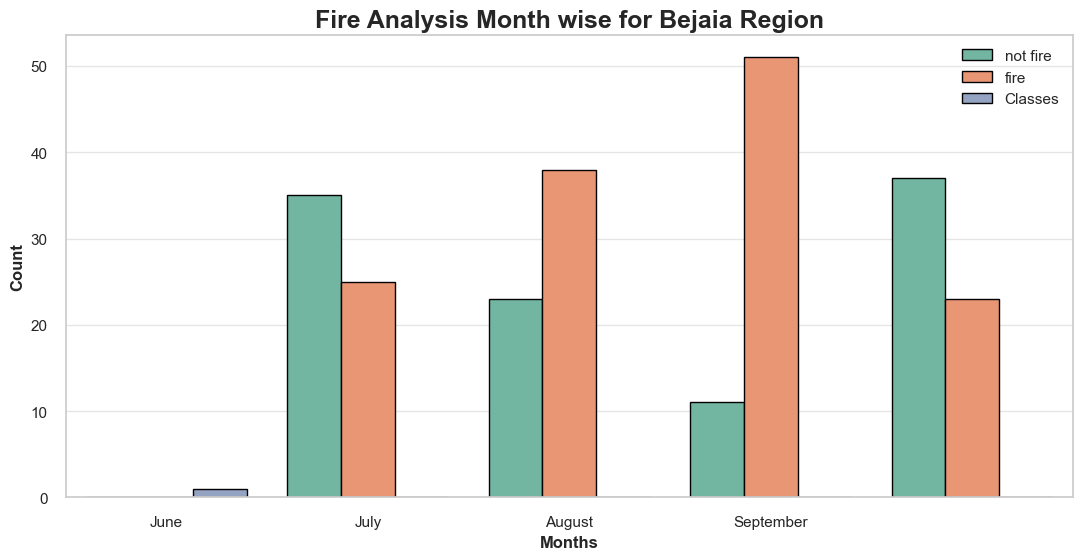

In [92]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df, ec='black', palette='Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

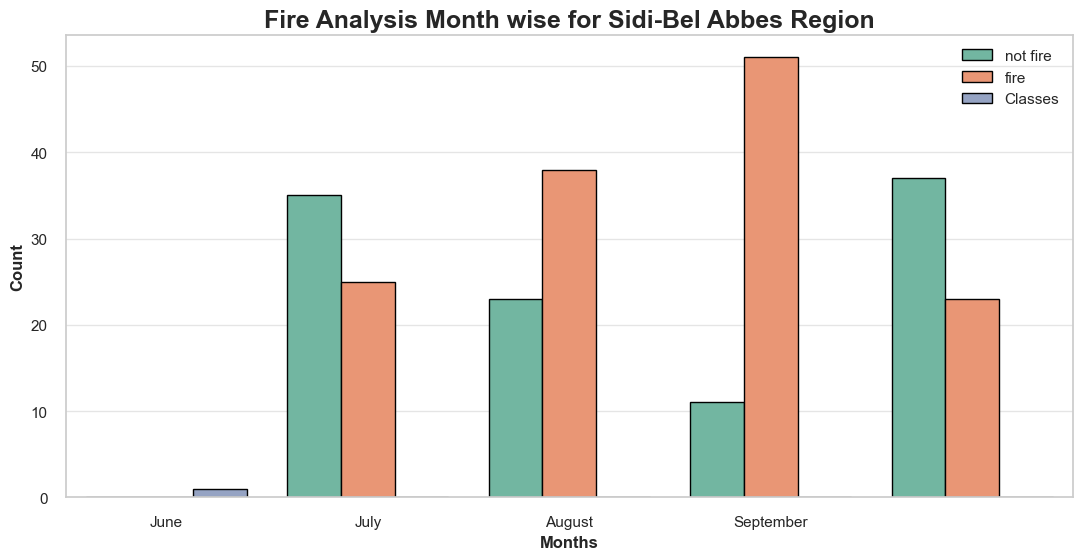

In [93]:
dftemp = df.loc[df['Region']==2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df, ec='black', palette='Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

* Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

* Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**

* Less Fires was on September

### 3.5 Exploratory Data Analysis (EDA) on all Features

In [94]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [97]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature = df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

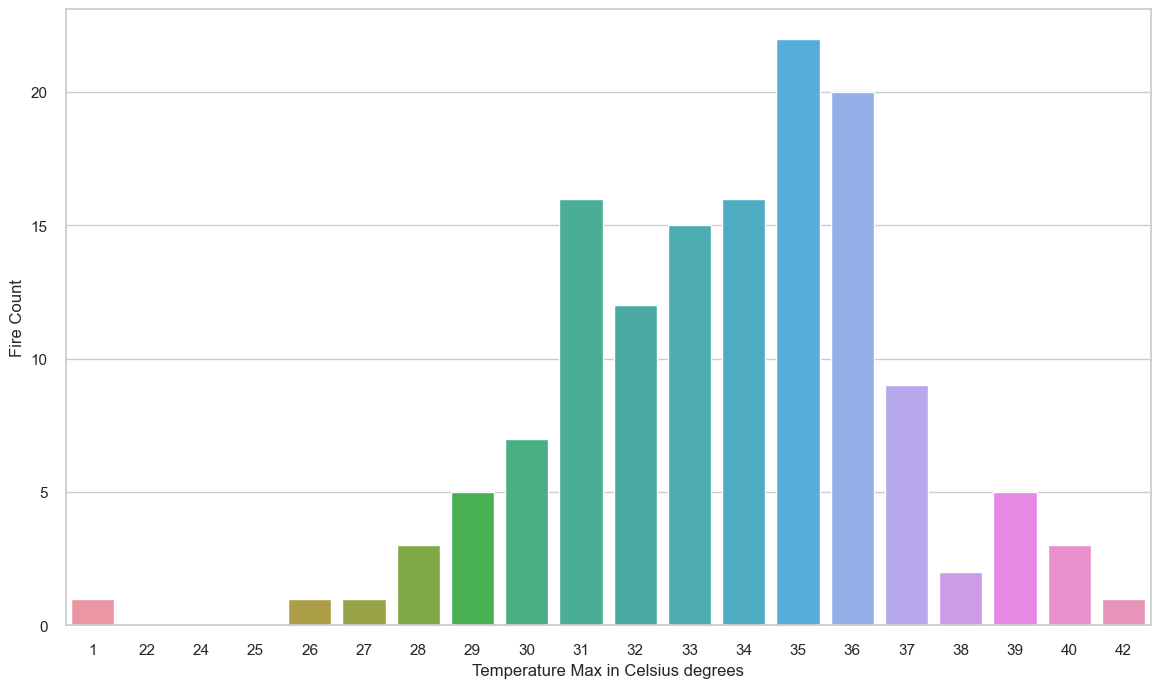

In [98]:
barchart('Temperature','Temperature Max in Celsius degrees')

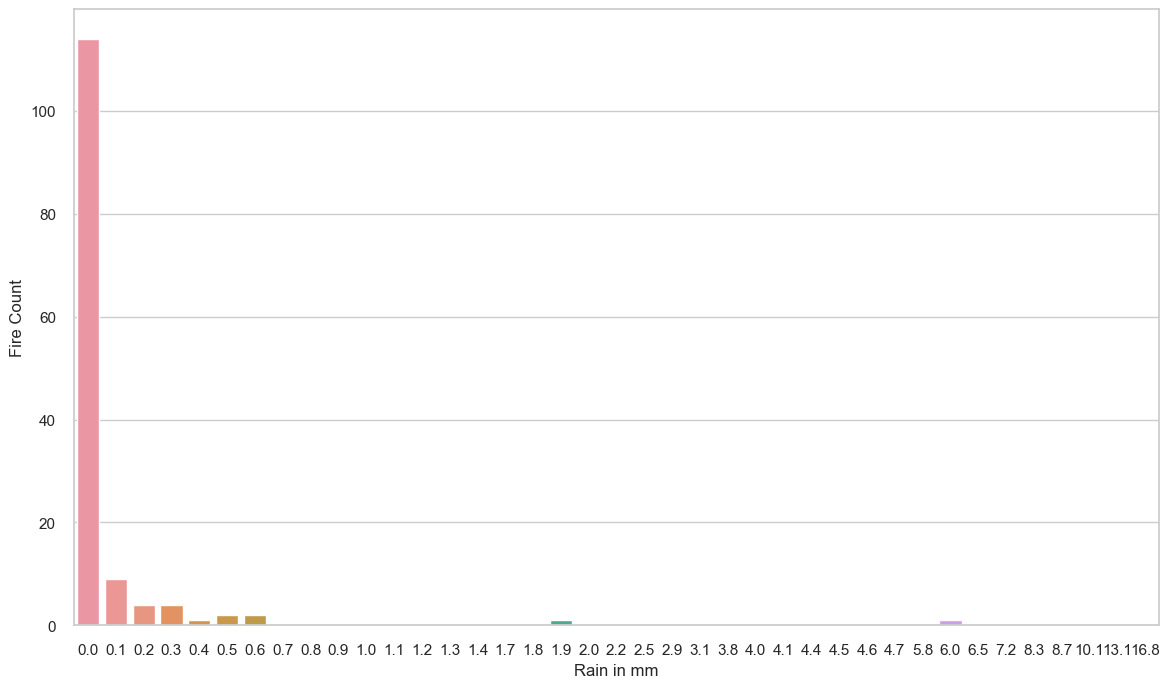

In [99]:
barchart('Rain', 'Rain in mm')

#### Fine Fuel Moisture Code (FFMC) index

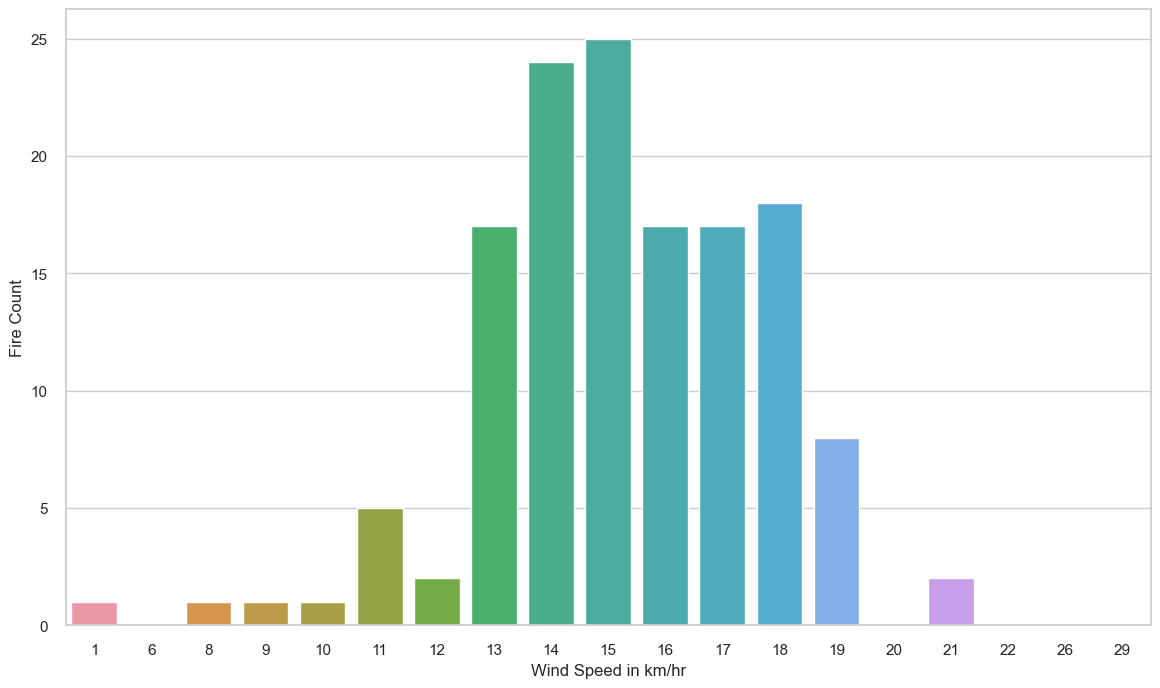

In [100]:
barchart('Ws', 'Wind Speed in km/hr')